# Microsoft Movie Startup: Innovating the Future of Entertainment

Introduction: In a rapidly evolving entertainment landscape, Microsoft ventures into the realm of film production and distribution with a fresh perspective, leveraging its technological prowess and vast resources to revolutionize the movie industry. By amalgamating cutting-edge technology with creative storytelling, Microsoft Movie Startup aims to redefine the cinematic experience for audiences worldwide.

Exploring the Current Movie Industry:

  . Content Creation:
  
   o Data-Driven Storytelling: Utilize advanced analytics and AI to analyze audience preferences and trends, guiding content         creation and enhancing storytelling.
   o Interactive Experiences: Explore interactive narratives and immersive storytelling techniques, blurring the lines between        traditional film and interactive media.
     
   . Technological Innovation:
   
     o Virtual Production: Embrace virtual production techniques like LED walls and real-time rendering to streamline production        workflows and enhance visual quality.
     o Blockchain for Transparency: Implement blockchain technology to enhance transparency in royalty payments, rights        
       management, and anti-piracy measures.

# Connecting to SQL Databases

Introduction

The project contains data arranged in database format which can be best explored using SQLite3 language. The files will first be opened to appreciate its content then perform some queries on it to filter and sort data.

Objectives

You will be able to:

    Connect to a SQLite database through the sqlite3 command-line interface
    Connect to a SQLite database through the sqlite3 Python library
    View information about database tables and column names
    Retrieve all information from a SQL table

SQLite Interfaces

Sqlite3 + pandas library is used since it is the most succinct and readable approach. The are imported then data is cleaned and explored.

Connecting to a Database Using Jupyter Notebook

Technically, we can execute terminal commands directly from a Jupyter Notebook. For example, we have used ! ls before to show the files in the current directory:

In [18]:
! ls

Microsoft_Movie_Project.ipynb
bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


Connecting to the Database

Instead, we will use the sqlite3 module (documentation here). The way that this module works is that we start by opening a connection to the database with sqlite3.connect:

In [19]:
import sqlite3 
conn = sqlite3.connect('im.db')

Let's continue on and create a cursor.

A cursor object is what can actually execute SQL commands. You create it by calling .cursor() on the connection.

In [20]:
cur = conn.cursor()

In [21]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [22]:
cur.execute("""SELECT * FROM movie_basics;""")
cur.fetchall()

[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

For a better view of the data from the "im.db" movie_basics table, we dispaly it as a data frame. From this display we get to see all the columns clearly and a sample of the data in the table

In [23]:
import pandas as pd

pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


At a glance we noticed that the genre column, Drama movies appear mostly or movies with some drama element in them. We thereby run a query to explore Drama related movies trends

In [24]:
pd.read_sql("""
SELECT *
  FROM movie_basics
 WHERE genres LIKE '%Drama%';"""
, conn)
#Dramatized = """SELECT * FROM movie_basics WHERE genre LIKE '%Drama%'""";
#print(Dramatized)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
49878,tt9914522,The Holden Family Plan,The Holden Family Plan,2019,NaN,"Drama,Family"
49879,tt9915872,The Last White Witch,The Last White Witch,2019,97.0,"Comedy,Drama,Fantasy"
49880,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
49881,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [25]:
pd.read_sql("""
SELECT *
  FROM movie_basics
 WHERE genres NOT LIKE '%Drama%';"""
, conn)
#Dramatized = """SELECT * FROM movie_basics WHERE genre LIKE '%Drama%'""";
#print(Dramatized)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
2,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
3,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
4,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography
...,...,...,...,...,...,...
90848,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
90849,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
90850,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
90851,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [26]:
pd.read_sql("""
SELECT *
  FROM movie_basics
 WHERE genres LIKE '%Documentary%';"""
, conn)
#Dramatized = """SELECT * FROM movie_basics WHERE genre LIKE '%Drama%'""";
#print(Dramatized)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
1,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary
2,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary
3,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary
4,tt0262759,Seven Jews from My Class,Siedmiu Zydów z mojej klasy,2018,40.0,Documentary
...,...,...,...,...,...,...
51635,tt9916132,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,2018,94.0,"Biography,Documentary,History"
51636,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
51637,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
51638,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary


In [27]:
pd.read_sql("""
SELECT *
  FROM movie_basics
 WHERE genres NOT LIKE '%Drama%' 
 AND genres NOT LIKE "%Documentary%";"""
, conn)
#Dramatized = """SELECT * FROM movie_basics WHERE genre LIKE '%Drama%'""";
#print(Dramatized)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
2,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
3,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography
4,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
...,...,...,...,...,...,...
43815,tt9914662,Wien is 't Hof van Commerce,Wien is 't Hof van Commerce,2018,NaN,Comedy
43816,tt9914828,The War of Godzilla,The War of Godzilla,2015,102.0,"Action,Comedy,Family"
43817,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
43818,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"


# Best genres
From the data from the im.db it is found that it is best to invest in movies that are either Drama or Documenary as they are almost 70 per cent of what is being produced. This is best illustrated by the Pie chart below

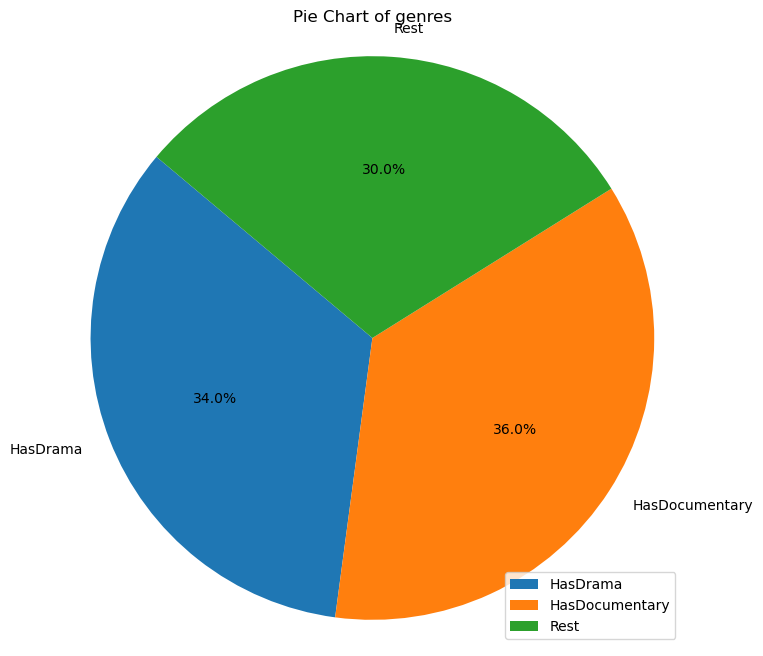

In [28]:
import matplotlib.pyplot as plt
# Data
labels = ['HasDrama', 'HasDocumentary', 'Rest']
sizes = [34, 36, 30]  # Percentages

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(loc="best")

plt.show()

We note that out of the 146143 in the im.db database, 49882 have drama which is 34% of genres of movies produced and 51,640 have Documentary related content which is 36% of genres of movies produced. Thereby the first recommendation to Microsoft is that as they venture into movie industry, the studio should have high regards to Drama and Documentary related content because of their dominnance

# Movie Ratings
From this dataset we get to investigate the ratings of the movies from their viewers. To make more sense of this data we peg the movie_id to the movie name and genre. This will assist in getting information on the genre that is more marketable and profitable

In [29]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;"""
, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Movie Gross
From this data set, we investigate the budget by various studios and evaluate their domestic and foreign gross earnings. From the null value counts we realize that there is no much data for the foreign gross

In [30]:
bom_movies = pd.read_csv("bom.movie_gross.csv.gz")
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
bom_movies.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [32]:
bom_movies.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [33]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [34]:
print('Percentage of Null foreign_gross Values:', len(bom_movies[bom_movies.foreign_gross.isna()])/ len(bom_movies))
print('Number of Unique foreign_gross Values:', bom_movies.foreign_gross.nunique())

Percentage of Null foreign_gross Values: 0.3985828166519043
Number of Unique foreign_gross Values: 1204


In [36]:
length = len(bom_movies["domestic_gross"])
length

3387

In [37]:
for i in range(12):
    print(f'i: {i}, Row: {i//4} Column: {i%4}')

i: 0, Row: 0 Column: 0
i: 1, Row: 0 Column: 1
i: 2, Row: 0 Column: 2
i: 3, Row: 0 Column: 3
i: 4, Row: 1 Column: 0
i: 5, Row: 1 Column: 1
i: 6, Row: 1 Column: 2
i: 7, Row: 1 Column: 3
i: 8, Row: 2 Column: 0
i: 9, Row: 2 Column: 1
i: 10, Row: 2 Column: 2
i: 11, Row: 2 Column: 3


In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The budget and domestic gross can be depicted as his shown below

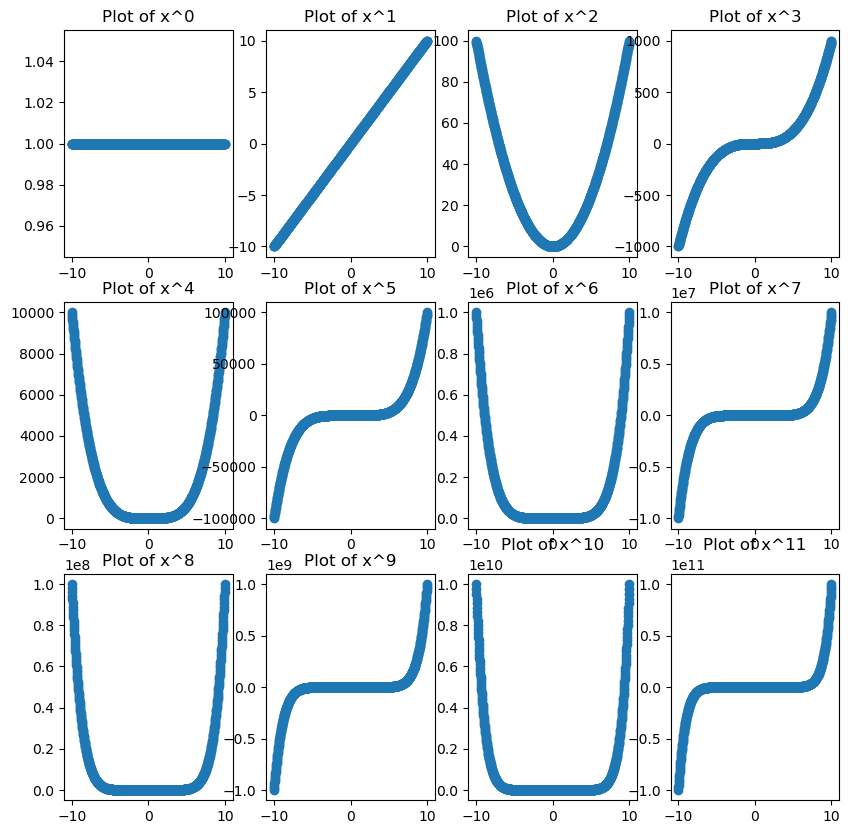

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
x = np.linspace(start=-10, stop=10, num=10*83)
for i in range(12):
    row = i//4
    col = i%4
    ax = axes[row, col]
    ax.scatter(x, x**i)
    ax.set_title(f'Plot of x^{i}')
plt.show()

In [41]:
studios = bom_movies["studio"]
studios

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object

In [42]:
unique_studios = set(bom_movies["studio"]) #None
unique_studios

{'3D',
 'A23',
 'A24',
 'ADC',
 'AF',
 'AGF',
 'ALP',
 'AM',
 'AR',
 'ATO',
 'AZ',
 'AaF',
 'Abk.',
 'Abr.',
 'Affirm',
 'Alc',
 'Amazon',
 'Ampl.',
 'Anch.',
 'Annapurna',
 'App.',
 'ArcEnt',
 'Argo.',
 'Arrow',
 'Arth.',
 'Asp.',
 'Aviron',
 'B360',
 'BBC',
 'BG',
 'BGP',
 'BH Tilt',
 'BM&DH',
 'BSC',
 'BSM',
 'BST',
 'BV',
 'BWP',
 'Blue Fox',
 'CARUSEL',
 'CAVU',
 'CBS',
 'CE',
 'CF&SR',
 'CFI',
 'CFilms',
 'CGld',
 'CJ',
 'CL',
 'CLF',
 'CLS',
 'CP',
 'CZ',
 'Cdgm.',
 'CineGalaxy',
 'Cleopatra',
 'Cohen',
 'Conglomerate',
 'Crimson',
 'Crnth',
 'DF',
 'DLA',
 'DR',
 'Da.',
 'Darin Southa',
 'Distrib.',
 'Dreamwest',
 'Drft.',
 'E1',
 'EC',
 'EF',
 'ELS',
 'ENTMP',
 'EOne',
 'EXCL',
 'Electric',
 'Elev.',
 'EpicPics',
 'Eros',
 'FCW',
 'FD',
 'FEF',
 'FIP',
 'FInd.',
 'FM',
 'FOAK',
 'FOR',
 'FR',
 'FRun',
 'FUN',
 'Fathom',
 'First',
 'Focus',
 'Fox',
 'FoxS',
 'Free',
 'GK',
 'Gaatri',
 'Gathr',
 'Gaum.',
 'Ghop',
 'Global Road',
 'Gold.',
 'Good Deed',
 'Grav.',
 'Greenwich',
 '

In [44]:
len(unique_studios)

258

In [45]:
bom_movies.index

RangeIndex(start=0, stop=3387, step=1)

In [46]:
bom_movies.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [47]:
bom_movies.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [48]:
bom_movies.shape

(3387, 5)

In [49]:
bom_movies.loc[3]

title               Inception
studio                     WB
domestic_gross    292600000.0
foreign_gross       535700000
year                     2010
Name: 3, dtype: object

In [50]:
bom_movies.loc[:,"studio"].head()

0      BV
1      BV
2      WB
3      WB
4    P/DW
Name: studio, dtype: object

In [51]:
movie_budget = pd.read_csv("tn.movie_budgets.csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [52]:
movie_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [53]:
df["gross_profit"] = float(df["worldwide_gross"]) - float(df["production_budget"])
df.head(3)

NameError: name 'df' is not defined

In [54]:
int(movie_budget["production_budget"])

TypeError: cannot convert the series to <class 'int'>

## RECOMMENDATIONS
Since Microsoft has a pool of developers at their disposal they can use this for content creation using AI
Also the current movie industry is using a lot of animations;  Microsoft is in an advantaged position with regards to animation creation and thereby reduce on their production costs
Microsoft is globally available and its movies would easily get a global presence since a global structure is already there

## CONCLUSION
Microsoft movie startup endeavors to lead the way by embracing technological advancements, fostering creativity and prioritizing engagement and inclusivity.
By reimagining the possibilities of storytelling and filmmaking, Microsoft aims to leave an indelible mark on the movie industry, shaping the future of entertainment for generations to come.